## Preview Data

In [1]:
# ============================================
# Cell 1: Imports
# ============================================
import gzip
import json
import ast
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 160)


In [2]:
# ============================================
# Cell 2: Helper to parse a single line
# ============================================

def parse_line_maybe_python_literal(line):
    """
    Try to parse one line as JSON; if that fails, fall back to
    Python literal (single-quoted dicts).
    """
    line = line.strip()
    if not line:
        return None

    # Try JSON first
    try:
        return json.loads(line)
    except Exception:
        pass

    # Fall back to Python literal (single quotes etc.)
    try:
        return ast.literal_eval(line)
    except Exception as e:
        # If both fail, bubble up with context
        raise ValueError(f"Could not parse line:\n{line[:200]}...\nError: {e}")


In [3]:
# ============================================
# Cell 3: Preview function (line-based first, then whole-file fallback)
# ============================================

def preview_dataset(path, max_records=5):
    print("=" * 100)
    print(f"Previewing: {path}")
    print("=" * 100)

    # 1) Try to treat the file as line-based (JSONL / Python-literal-per-line)
    with gzip.open(path, "rt", encoding="utf-8") as f:
        lines = list(itertools.islice(f, max_records))

    print("\n--- Raw text sample (first few lines) ---")
    for i, line in enumerate(lines):
        print(f"[Line {i}] {line[:200].rstrip()}{'...' if len(line) > 200 else ''}")

    # Try parsing each line separately
    parsed = []
    try:
        for line in lines:
            obj = parse_line_maybe_python_literal(line)
            if obj is not None:
                parsed.append(obj)
    except ValueError as e:
        print("\nLine-based parse failed, trying whole-file parse instead.")
        print("Reason:", e)
        parsed = None

    if parsed:
        # We successfully parsed a few line-based records
        df = pd.DataFrame(parsed)
        print("\n--- DataFrame head() (line-based) ---")
        display(df.head())
        print("\nColumns:", list(df.columns))
        print("Sample size used:", len(df))
        return

    # 2) If line-based parsing failed, try whole-file parse (JSON or Python literal)
    print("\n--- Trying whole-file parse ---")
    with gzip.open(path, "rt", encoding="utf-8") as f:
        text = f.read()

    obj = None
    # Try JSON
    try:
        obj = json.loads(text)
        print("Whole-file parsed as JSON.")
    except Exception:
        pass

    if obj is None:
        # Try Python literal
        try:
            obj = ast.literal_eval(text)
            print("Whole-file parsed as Python literal.")
        except Exception as e:
            print("Whole-file parse failed as well.")
            print("Error:", e)
            return

    # If we reach here, we have some Python/JSON object
    if isinstance(obj, list) and obj and isinstance(obj[0], dict):
        df = pd.DataFrame(obj[:max_records])
        print("\n--- DataFrame head() (whole-file) ---")
        display(df.head())
        print("\nColumns:", list(df.columns))
        print("Total objects in file (approx):", len(obj))
    elif isinstance(obj, dict):
        print("\nTop-level object is a dict. Keys:")
        print(list(obj.keys())[:20])
    else:
        print("\nParsed object type:", type(obj))


In [4]:
# ============================================
# Cell 4: Preview each of your Steam / AU datasets
# ============================================

files = [
    "australian_user_reviews.json.gz",
    "australian_users_items.json.gz",
    "bundle_data.json.gz",
    "steam_games.json.gz",
    "steam_reviews.json.gz",
]

for f in files:
    preview_dataset(f, max_records=5)


Previewing: australian_user_reviews.json.gz

--- Raw text sample (first few lines) ---
[Line 0] {'user_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'reviews': [{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250...
[Line 1] {'user_id': 'js41637', 'user_url': 'http://steamcommunity.com/id/js41637', 'reviews': [{'funny': '', 'posted': 'Posted June 24, 2014.', 'last_edited': '', 'item_id': '251610', 'helpful': '15 of 20 peo...
[Line 2] {'user_id': 'evcentric', 'user_url': 'http://steamcommunity.com/id/evcentric', 'reviews': [{'funny': '', 'posted': 'Posted February 3.', 'last_edited': '', 'item_id': '248820', 'helpful': 'No ratings...
[Line 3] {'user_id': 'doctr', 'user_url': 'http://steamcommunity.com/id/doctr', 'reviews': [{'funny': '', 'posted': 'Posted October 14, 2013.', 'last_edited': '', 'item_id': '250320', 'helpful': '2 of 2 people...
[Line 4] {'user_id': 'maplemage', 'user_url': 'http://steamcom

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."



Columns: ['user_id', 'user_url', 'reviews']
Sample size used: 5
Previewing: australian_users_items.json.gz

--- Raw text sample (first few lines) ---
[Line 0] {'user_id': '76561197970982479', 'items_count': 277, 'steam_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'items': [{'item_id': '10', 'item_name': 'Coun...
[Line 1] {'user_id': 'js41637', 'items_count': 888, 'steam_id': '76561198035864385', 'user_url': 'http://steamcommunity.com/id/js41637', 'items': [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_for...
[Line 2] {'user_id': 'evcentric', 'items_count': 137, 'steam_id': '76561198007712555', 'user_url': 'http://steamcommunity.com/id/evcentric', 'items': [{'item_id': '1200', 'item_name': 'Red Orchestra: Ostfront...
[Line 3] {'user_id': 'Riot-Punch', 'items_count': 328, 'steam_id': '76561197963445855', 'user_url': 'http://steamcommunity.com/id/Riot-Punch', 'items': [{'item_id': '10', 'item_name': 'Counter-Strike', 'playti..

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."



Columns: ['user_id', 'items_count', 'steam_id', 'user_url', 'items']
Sample size used: 5
Previewing: bundle_data.json.gz

--- Raw text sample (first few lines) ---
[Line 0] {'bundle_final_price': '$66.46', 'bundle_url': 'http://store.steampowered.com/bundle/450/?utm_source=SteamDB&utm_medium=SteamDB&utm_campaign=SteamDB%20Bundles%20Page', 'bundle_price': '$73.86', 'bundl...
[Line 1] {'bundle_final_price': '$20.15', 'bundle_url': 'http://store.steampowered.com/bundle/1473/?utm_source=SteamDB&utm_medium=SteamDB&utm_campaign=SteamDB%20Bundles%20Page', 'bundle_price': '$25.87', 'bund...
[Line 2] {'bundle_final_price': '$20.15', 'bundle_url': 'http://store.steampowered.com/bundle/1474/?utm_source=SteamDB&utm_medium=SteamDB&utm_campaign=SteamDB%20Bundles%20Page', 'bundle_price': '$25.87', 'bund...
[Line 3] {'bundle_final_price': '$15.17', 'bundle_url': 'http://store.steampowered.com/bundle/1437/?utm_source=SteamDB&utm_medium=SteamDB&utm_campaign=SteamDB%20Bundles%20Page', 'bundle_price': '$

,bundle_final_price,bundle_url,bundle_price,bundle_name,bundle_id,items,bundle_discount
0,$66.46,http://store.steampowered.com/bundle/450/?utm_...,$73.86,Dharker Studio 2015 Complete,450,"[{'genre': 'Adventure, Indie, RPG', 'item_id':...",10%
1,$20.15,http://store.steampowered.com/bundle/1473/?utm...,$25.87,"Naruto Shippuden Uncut Season 4, Vol. 3",1473,"[{'genre': '', 'item_id': '528360', 'discounte...",22%
2,$20.15,http://store.steampowered.com/bundle/1474/?utm...,$25.87,"Naruto Shippuden Uncut Season 4, Vol. 4",1474,"[{'genre': '', 'item_id': '528380', 'discounte...",22%
3,$15.17,http://store.steampowered.com/bundle/1437/?utm...,$25.35,Pixel Puzzles Ultimate: Starter Kit,1437,"[{'genre': 'Casual, Free to Play, Indie, Simul...",40%
4,$20.15,http://store.steampowered.com/bundle/1466/?utm...,$25.87,"Naruto Shippuden Uncut Season 4, Vol. 1",1466,"[{'genre': '', 'item_id': '527830', 'discounte...",22%



Columns: ['bundle_final_price', 'bundle_url', 'bundle_price', 'bundle_name', 'bundle_id', 'items', 'bundle_discount']
Sample size used: 5
Previewing: steam_games.json.gz

--- Raw text sample (first few lines) ---
[Line 0] {u'publisher': u'Kotoshiro', u'genres': [u'Action', u'Casual', u'Indie', u'Simulation', u'Strategy'], u'app_name': u'Lost Summoner Kitty', u'title': u'Lost Summoner Kitty', u'url': u'http://store.stea...
[Line 1] {u'publisher': u'Making Fun, Inc.', u'genres': [u'Free to Play', u'Indie', u'RPG', u'Strategy'], u'app_name': u'Ironbound', u'sentiment': u'Mostly Positive', u'title': u'Ironbound', u'url': u'http://s...
[Line 2] {u'publisher': u'Poolians.com', u'genres': [u'Casual', u'Free to Play', u'Indie', u'Simulation', u'Sports'], u'app_name': u'Real Pool 3D - Poolians', u'sentiment': u'Mostly Positive', u'title': u'Real...
[Line 3] {u'publisher': u'\u5f7c\u5cb8\u9886\u57df', u'genres': [u'Action', u'Adventure', u'Casual'], u'app_name': u'\u5f39\u70b8\u4eba2222', u'tit

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN



Columns: ['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'discount_price', 'reviews_url', 'specs', 'price', 'early_access', 'id', 'developer', 'sentiment']
Sample size used: 5
Previewing: steam_reviews.json.gz

--- Raw text sample (first few lines) ---
[Line 0] {u'username': u'Chaos Syren', u'hours': 0.1, u'products': 41, u'product_id': u'725280', u'page_order': 0, u'date': u'2017-12-17', u'text': u'This would not be acceptable as an entertainment even back...
[Line 1] {u'username': u'\u20ae\u029c\u1d07 W\u1d00\u0280\u1d1b\u1d0f\u0274', u'hours': 51.1, u'products': 769, u'product_id': u'328100', u'page_order': 0, u'date': u'2017-12-27', u'text': u'looks like a faceb...
[Line 2] {u'username': u'hello?<', u'text': u'Better than Minecraft', u'hours': 14.6, u'date': u'2017-10-16', u'early_access': False, u'found_funny': 2, u'product_id': u'328100', u'page_order': 1, u'compensati...
[Line 3] {u'username': u'Cyderine916', u'hours': 5.0, u'products': 64, u'product

,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id
0,Chaos Syren,0.1,41,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN
2,hello?<,14.6,2,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN
3,Cyderine916,5.0,64,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN
4,DarklyThinking,16.6,577,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,76561198007483075



Columns: ['username', 'hours', 'products', 'product_id', 'page_order', 'date', 'text', 'early_access', 'page', 'found_funny', 'compensation', 'user_id']
Sample size used: 5


## EDA

In [5]:
# ============================================================
# Cell 2: Load a sample of steam_reviews.json.gz
# ============================================================

REVIEWS_PATH = "steam_reviews.json.gz"

N_ROWS_REVIEWS = 600_000

rows = []
with gzip.open(REVIEWS_PATH, "rt", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= N_ROWS_REVIEWS:
            break
        obj = parse_line_maybe_python_literal(line)
        if obj is not None:
            rows.append(obj)

df_reviews = pd.DataFrame(rows)
print("df_reviews shape:", df_reviews.shape)
display(df_reviews.head())


df_reviews shape: (600000, 12)


,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769.0,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN
2,hello?<,14.6,2.0,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN
3,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN
4,DarklyThinking,16.6,577.0,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,76561198007483075


In [6]:
# ============================================================
# Cell 3: Basic info about steam_reviews
# ============================================================

print("Columns in df_reviews:")
print(df_reviews.columns.tolist())

print("\nDataFrame info:")
print(df_reviews.info())

print("\nBasic describe for numeric columns:")
display(df_reviews.describe())

print("\nNA counts:")
display(df_reviews.isna().sum())


Columns in df_reviews:
['username', 'hours', 'products', 'product_id', 'page_order', 'date', 'text', 'early_access', 'page', 'found_funny', 'compensation', 'user_id']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   username      600000 non-null  object 
 1   hours         599353 non-null  float64
 2   products      598959 non-null  float64
 3   product_id    600000 non-null  object 
 4   page_order    600000 non-null  int64  
 5   date          600000 non-null  object 
 6   text          600000 non-null  object 
 7   early_access  600000 non-null  bool   
 8   page          600000 non-null  int64  
 9   found_funny   95545 non-null   float64
 10  compensation  11516 non-null   object 
 11  user_id       240850 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 50.9+ MB
None

Basic descr

,hours,products,page_order,page,found_funny
count,599353.000000,598959.000000,600000.000000,600000.000000,95545.000000
mean,88.475791,243.267619,4.481480,622.866443,7.711162
std,306.385792,504.154171,2.873012,1065.457371,60.095318
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.400000,45.000000,2.000000,43.000000,1.000000
50%,13.100000,111.000000,4.000000,193.000000,1.000000
75%,55.000000,251.000000,7.000000,629.000000,3.000000
max,42100.700000,14185.000000,9.000000,5911.000000,4586.000000



NA counts:


username             0
hours              647
products          1041
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
found_funny     504455
compensation    588484
user_id         359150
dtype: int64

Number of rows with hours > 0: 599094

Basic stats for hours:


count    599094.000000
mean         88.514041
std         306.446490
min           0.100000
50%          13.100000
75%          55.000000
90%         207.200000
95%         401.600000
99%        1205.800000
max       42100.700000
Name: hours, dtype: float64

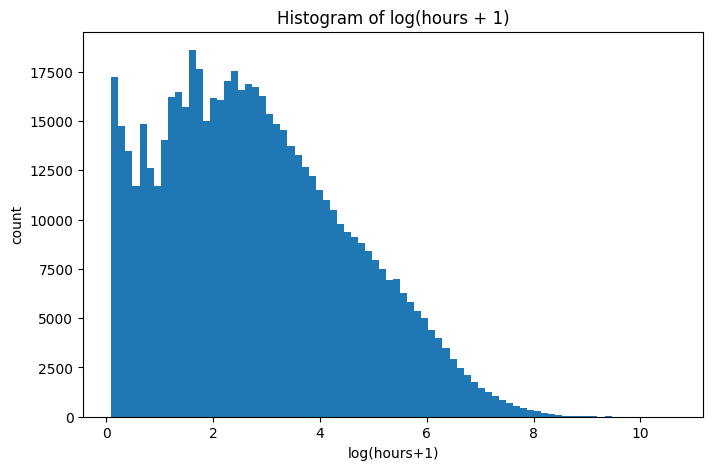

In [7]:
# ============================================================
# Cell 4: Distribution of hours
# ============================================================

# Keep only rows with non-null and positive hours
df_hours = df_reviews[df_reviews["hours"].notna() & (df_reviews["hours"] > 0)].copy()

print("Number of rows with hours > 0:", len(df_hours))

print("\nBasic stats for hours:")
display(df_hours["hours"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))

plt.figure(figsize=(8,5))
plt.hist(np.log1p(df_hours['hours']), bins=80)
plt.title("Histogram of log(hours + 1)")
plt.xlabel("log(hours+1)")
plt.ylabel("count")
plt.show()



In [8]:
# ============================================================
# Cell 4: Candidate thresholds for high engagement
# ============================================================

percentiles = [0.5, 0.75, 0.9, 0.95, 0.99]
vals = np.percentile(df_hours["hours"], [p*100 for p in percentiles])

for p, v in zip(percentiles, vals):
    print(f"{int(p*100)}th percentile = {v:.2f} hours")

# Example threshold
T = 10.0
ratio = (df_hours["hours"] >= T).mean()
print(f"\nIf T = {T}h → high engagement ratio = {ratio:.4f}")


50th percentile = 13.10 hours
75th percentile = 55.00 hours
90th percentile = 207.20 hours
95th percentile = 401.60 hours
99th percentile = 1205.80 hours

If T = 10.0h → high engagement ratio = 0.5548


In [9]:
# ============================================================
# Cell 7: Load steam_games.json.gz (item metadata)
# ============================================================

GAMES_PATH = "steam_games.json.gz"

rows_games = []
with gzip.open(GAMES_PATH, "rt", encoding="utf-8") as f:
    for line in f:
        obj = parse_line_maybe_python_literal(line)
        if obj is not None:
            rows_games.append(obj)

df_games = pd.DataFrame(rows_games)
print("df_games shape:", df_games.shape)
display(df_games.head())

print("\nColumns in df_games:")
print(df_games.columns.tolist())


df_games shape: (32135, 16)


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN



Columns in df_games:
['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'discount_price', 'reviews_url', 'specs', 'price', 'early_access', 'id', 'developer', 'sentiment', 'metascore']


In [10]:
# ============================================================
# Cell 8: Merge item metadata into reviews
# ============================================================

# Ensure product_id is string, df_games id also as string
df_hours["product_id"] = df_hours["product_id"].astype(str)
df_games["id"] = df_games["id"].astype(str)

cols_keep = ["id", "price", "discount_price", "genres", "tags", "sentiment", "release_date"]
df_games_small = df_games[cols_keep].copy()

df_merged = df_hours.merge(
    df_games_small,
    left_on="product_id",
    right_on="id",
    how="left"
)

print("df_merged shape:", df_merged.shape)
display(df_merged.head())

print("\nNA counts (selected columns):")
display(df_merged[["hours", "price", "discount_price", "genres", "tags", "sentiment"]].isna().sum())


df_merged shape: (599094, 19)


,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id,id,price,discount_price,genres,tags,sentiment,release_date
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN,725280,2.99,NaN,"[Action, Adventure, Indie, Simulation]","[Action, Adventure, Indie, Simulation]",Positive,2017-11-10
1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769.0,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN,328100,14.99,NaN,"[Adventure, Indie, RPG]","[Adventure, RPG, Indie, Puzzle, Match 3]",Mixed,2014-11-07
2,hello?<,14.6,2.0,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN,328100,14.99,NaN,"[Adventure, Indie, RPG]","[Adventure, RPG, Indie, Puzzle, Match 3]",Mixed,2014-11-07
3,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN,35140,19.99,NaN,"[Action, Adventure]","[Action, Batman, Stealth, Adventure, Third Per...",Overwhelmingly Positive,2010-03-26
4,DarklyThinking,16.6,577.0,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,76561198007483075,35140,19.99,NaN,"[Action, Adventure]","[Action, Batman, Stealth, Adventure, Third Per...",Overwhelmingly Positive,2010-03-26



NA counts (selected columns):


hours                  0
price               7094
discount_price    598719
genres               613
tags                   0
sentiment             47
dtype: int64

In [11]:
# ============================================================
# Cell 9: Basic EDA by price bucket and sentiment
# ============================================================

# Make a simple price bucket
df_merged["price_clean"] = pd.to_numeric(df_merged["price"], errors="coerce")
bins = [-0.01, 0.01, 5, 10, 20, 50, 200]
labels = ["Free", "0-5", "5-10", "10-20", "20-50", "50+"]
df_merged["price_bucket"] = pd.cut(df_merged["price_clean"], bins=bins, labels=labels)

price_stats = df_merged.groupby("price_bucket")["hours"].agg(["count", "mean", "median"])
print("Hours by price bucket:")
display(price_stats)

# Sentiment stats
sentiment_stats = df_merged.groupby("sentiment")["hours"].agg(["count", "mean", "median"])
print("\nHours by sentiment:")
display(sentiment_stats)


Hours by price bucket:


/var/folders/pw/w9h6j2g52jbdt27qnh7vl_nh0000gn/T/ipykernel_38124/690923765.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stats = df_merged.groupby("price_bucket")["hours"].agg(["count", "mean", "median"])


,count,mean,median
price_bucket,,,
Free,0,NaN,NaN
0-5,53415,10.623804,2.5
5-10,83724,18.794064,6.2
10-20,218097,75.073268,14.7
20-50,102070,180.042280,72.0
50+,14133,42.438718,30.2



Hours by sentiment:


,count,mean,median
sentiment,,,
1 user reviews,146,5.395205,1.60
2 user reviews,260,3.965769,1.15
3 user reviews,284,3.946831,0.90
4 user reviews,508,21.675787,3.15
5 user reviews,347,4.985303,2.40
6 user reviews,300,3.528000,1.45
7 user reviews,254,4.043701,1.95
8 user reviews,186,3.917204,1.40
9 user reviews,216,9.833333,2.40


Top 20 genres by number of interactions:


,count,mean,median
genres,,,
Action,417603,92.587441,14.80
Indie,304751,49.460952,6.80
Adventure,209852,80.539723,13.90
RPG,135228,120.226784,25.80
Free to Play,124752,123.473291,12.10
Simulation,84782,77.868142,12.60
Strategy,59042,74.313827,14.70
Casual,49804,33.638627,3.60
Massively Multiplayer,49316,175.005872,26.40


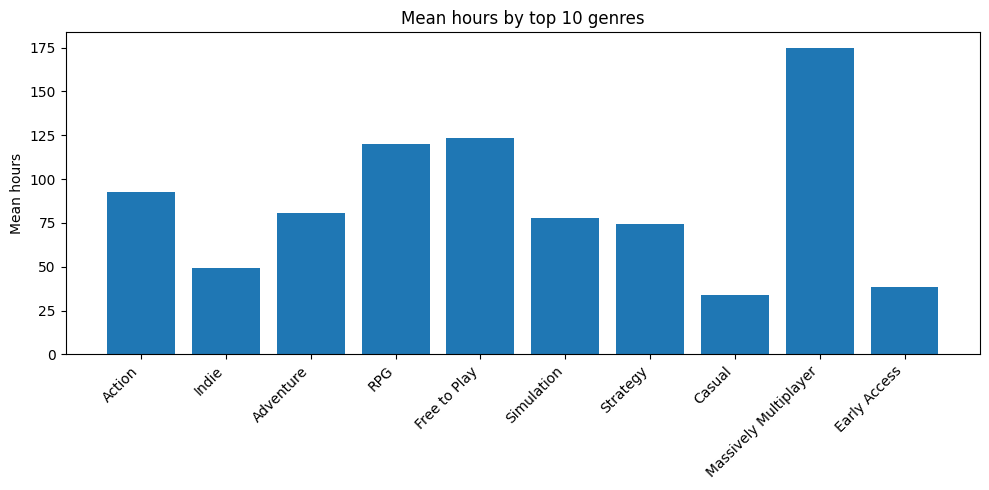

In [12]:
# ============================================================
# Cell 10: EDA by genre (explode genres list)
# ============================================================

# genres 是一个 list，先把 NaN 填成空 list
df_merged["genres"] = df_merged["genres"].apply(lambda g: g if isinstance(g, list) else [])

df_genre = df_merged.explode("genres")
df_genre = df_genre[df_genre["genres"] != ""]  # drop empty

genre_stats = df_genre.groupby("genres")["hours"].agg(["count", "mean", "median"]).sort_values("count", ascending=False)

print("Top 20 genres by number of interactions:")
display(genre_stats.head(20))

plt.figure(figsize=(10, 5))
top_genres = genre_stats.head(10)
plt.bar(top_genres.index, top_genres["mean"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean hours")
plt.title("Mean hours by top 10 genres")
plt.tight_layout()
plt.show()


## Dataset

In [13]:
# ============================================
# Cell 1: Construct labeled dataset for modeling
# ============================================

# Threshold for high engagement
T = 10.0
df_hours["label"] = (df_hours["hours"] >= T).astype(int)

# Keep essential columns only for baseline
df_model = df_hours[["user_id", "product_id", "hours", "label"]].copy()

# Filter out rows with null user_id or product_id (required for modeling)
print(f"Before filtering: {len(df_model)} rows")
print(f"Null user_id count: {df_model['user_id'].isna().sum()}")
print(f"Null product_id count: {df_model['product_id'].isna().sum()}")

df_model = df_model[df_model["user_id"].notna() & df_model["product_id"].notna()].copy()

print(f"\nAfter filtering: {len(df_model)} rows")
print("\nLabel distribution:")
print(df_model["label"].value_counts(normalize=True))


Before filtering: 599094 rows
Null user_id count: 358465
Null product_id count: 0

After filtering: 240629 rows

Label distribution:
label
1    0.592676
0    0.407324
Name: proportion, dtype: float64


In [14]:
# ============================================
# Cell 2: Train/Val/Test split by interactions
# ============================================
# NOTE: Changed from split by user_id to split by interactions
# This ensures same users appear in train/val/test (needed for NCF embeddings)
# while still maintaining temporal separation through random split

from sklearn.model_selection import train_test_split

# Split by interactions (rows) instead of by users
# This allows same users in train/val/test, which is needed for embedding-based models
# Stratify by label to maintain class distribution

# First split: train+val vs test (70% train+val, 15% test)
train_val_df, test_df = train_test_split(
    df_model, 
    test_size=0.15, 
    random_state=42,
    stratify=df_model['label']
)

# Second split: train vs val (85% train, 15% val of remaining 85%)
# 0.176 × 0.85 ≈ 0.15 → val = 15% of total
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.176,  # 0.176 of 0.85 ≈ 0.15 of total
    random_state=42,
    stratify=train_val_df['label']
)

# Verify user overlap
train_users = set(train_df["user_id"].unique())
val_users = set(val_df["user_id"].unique())
test_users = set(test_df["user_id"].unique())

overlap_train_val = len(train_users & val_users)
overlap_train_test = len(train_users & test_users)

print(f"Train users: {len(train_users)}")
print(f"Val users:   {len(val_users)}")
print(f"Test users:  {len(test_users)}")
print(f"\nUser overlap:")
print(f"  Train ∩ Val: {overlap_train_val} users ({overlap_train_val/len(val_users)*100:.1f}% of val users)")
print(f"  Train ∩ Test: {overlap_train_test} users ({overlap_train_test/len(test_users)*100:.1f}% of test users)")

print("\nRow counts:")
print(f"Train: {len(train_df)}")
print(f"Val:   {len(val_df)}")
print(f"Test:  {len(test_df)}")
print(f"Total: {len(train_df) + len(val_df) + len(test_df)}")

print("\nLabel distribution:")
print(f"Train - label=1: {train_df['label'].mean():.4f}")
print(f"Val   - label=1: {val_df['label'].mean():.4f}")
print(f"Test  - label=1: {test_df['label'].mean():.4f}")


Train users: 141256
Val users:   34212
Test users:  34414

User overlap:
  Train ∩ Val: 9050 users (26.5% of val users)
  Train ∩ Test: 9095 users (26.4% of test users)

Row counts:
Train: 168536
Val:   35998
Test:  36095
Total: 240629

Label distribution:
Train - label=1: 0.5927
Val   - label=1: 0.5927
Test  - label=1: 0.5927


## Baselines

### Binary task baseline

In [15]:
# ============================================
# Cell 3: Evaluation metrics helper
# ============================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_predictions(y_true, y_pred_prob):
    # Convert probabilities to class labels at threshold 0.5
    y_pred = (y_pred_prob >= 0.5).astype(int)

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "auroc": roc_auc_score(y_true, y_pred_prob),
    }


In [16]:
# ============================================
# Cell 4: Baseline 1 — Majority Class
# ============================================

majority_prob = train_df["label"].mean()   # P(y=1)
print("Majority probability:", majority_prob)

y_true = test_df["label"].values
y_pred_prob = np.ones_like(y_true) * majority_prob

metrics_majority = evaluate_predictions(y_true, y_pred_prob)
metrics_majority


Majority probability: 0.592674562111359


{'accuracy': 0.5926859675855382,
 'precision': 0.5926859675855382,
 'recall': 1.0,
 'f1': 0.7442596715836348,
 'auroc': np.float64(0.5)}

In [17]:
# ============================================
# Cell 5: Baseline 2 — Hybrid Hours (Regression-based Binary)
# ============================================
# Predict hours using hybrid (user + item mean), then convert to binary (>= 10 hours)

# Calculate user and item means for hours
user_means_hours = train_df.groupby("user_id")["hours"].mean()
item_means_hours = train_df.groupby("product_id")["hours"].mean()
global_mean_hours = train_df["hours"].mean()

# Predict hours using hybrid approach
y_pred_hours_hybrid = 0.5 * (test_df["user_id"].map(user_means_hours).fillna(global_mean_hours) + 
                             test_df["product_id"].map(item_means_hours).fillna(global_mean_hours)).values

# Convert to binary: >= 10 hours
T = 10.0
y_pred_prob = (y_pred_hours_hybrid >= T).astype(float)
y_true = test_df["label"].values

metrics_hybrid_hours = evaluate_predictions(y_true, y_pred_prob)
metrics_hybrid_hours


{'accuracy': 0.6250450200858845,
 'precision': 0.6138424544427383,
 'recall': 0.9904174262609264,
 'f1': 0.7579323913432302,
 'auroc': np.float64(0.5419030404328711)}

In [19]:
# ============================================
# Cell 6: Compare all baselines
# ============================================

import pandas as pd

baseline_results = pd.DataFrame({
    "majority": metrics_majority,
    "hybrid_hours": metrics_hybrid_hours
}).T

baseline_results


,accuracy,precision,recall,f1,auroc
majority,0.592686,0.592686,1.000000,0.744260,0.500000
hybrid_hours,0.625045,0.613842,0.990417,0.757932,0.541903


### Regression task baseline

In [20]:
# ============================================
# Cell 3: Baseline Models - Simple Statistics (Regression)
# ============================================

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred):
    """Evaluate regression predictions."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Also compute median metrics (robust to outliers)
    median_ae = np.median(np.abs(y_true - y_pred))
    
    return {
        "RMSE": rmse,
        "MAE": mae,
        "Median_AE": median_ae,
        "R2": r2
    }

# Baseline 1: Global mean
global_mean = train_df["hours"].mean()
y_pred_global = np.full(len(test_df), global_mean)
baseline_global = evaluate_regression(test_df["hours"].values, y_pred_global)

# Baseline 2: User mean
user_means = train_df.groupby("user_id")["hours"].mean()
y_pred_user = test_df["user_id"].map(user_means).fillna(global_mean).values
baseline_user = evaluate_regression(test_df["hours"].values, y_pred_user)

# Baseline 3: Item mean
item_means = train_df.groupby("product_id")["hours"].mean()
y_pred_item = test_df["product_id"].map(item_means).fillna(global_mean).values
baseline_item = evaluate_regression(test_df["hours"].values, y_pred_item)

# Baseline 4: User + Item average
y_pred_hybrid = 0.5 * (test_df["user_id"].map(user_means).fillna(global_mean) + 
                       test_df["product_id"].map(item_means).fillna(global_mean)).values
baseline_hybrid = evaluate_regression(test_df["hours"].values, y_pred_hybrid)

# Compare all regression baselines
regression_baseline_results = pd.DataFrame({
    "global_mean": baseline_global,
    "user_mean": baseline_user,
    "item_mean": baseline_item,
    "hybrid": baseline_hybrid
}).T

regression_baseline_results


,RMSE,MAE,Median_AE,R2
global_mean,338.742179,134.230871,93.810517,-0.000002
user_mean,318.886942,110.634580,84.210517,0.113792
item_mean,318.145144,106.368124,30.846455,0.117910
hybrid,306.547318,104.302750,52.864208,0.181050
